# Decision Trees

## A Small Example

We'd like to see how we can use python to train a decision tree classifier. We'll start practicing using a dataset that we create.

As usual, we'll start by importing some libraries that we'll need. This includes "tree" from scikit-learn, so that we can use a decision tree. In order to plot our data, we'll also import a plotting library.



In [0]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

Next, let's create our data. Later, we'll see how we can use decision trees on a real-world dataset. But for now, we'll work with a small, simple example that we invent.

We have 14 samples, and for each sample, we have measurements for two features along with the label. The features are stored in one array, and the labels in another. For example, the first sample has feature measurements -13 and -8, and label 1. The tenth sample has feature measurements 3 and -2, and label 3.

In [0]:
features = np.array([[-13,-8],[-7,1],[-8,-1,],[-3,-2],[1,2],[2,1],[3,2],[4,1],[3,0],[3,-2],[3.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]])
labels = np.array([1,1,1,1,2,2,2,2,2,3,3,3,3,3])

Before we try to train a decision tree, let's plot our data to get a sense of how it's distributed. We plot the points using their feature measurements for coordinates, and we use the labels to color the points. Here, the purple points correspond to class 1, the green points to class 2, and the yellow points to class 3. 

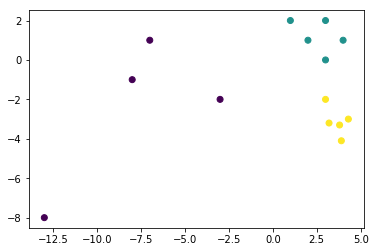

In [3]:
plt.scatter(features[:,0],features[:,1],c=labels)
plt.show()

Looking at our plot, it looks like this data is nicely grouped, and that a decision tree should work very nicely. We now construct a decision tree classifier, and train it on our data.

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

We've now created a decision tree classifier based on this dataset, but how can we tell what it's doing? We'll now use a couple of tools for visualizing our decision tree.

The first tool draws out the decision tree for us. This code uses a package calls graphviz, which may or may not be installed on your computer. If the code below runs and you see a decision tree, everything's working correctly!

If it doesn't work, you can run the following commands in the terminal to install graphviz. If you're not sure what this means, ask an instructor to help you out.

`conda install graphviz`

`pip install graphviz`

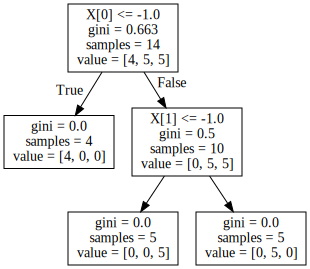

In [5]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

This displays a lot of information. Here, $X[0]$ is the value of the first feature (the $x$-coordinate), and $X[1]$ is the value of the second feature (the $y$-coordinate). So, the first split checks if the $x$-coordinate is less than or equal to $-1$.

The "gini" listed here is the gini impurity of the node. This is a sort of measure of the uncertainty at that point in the decision tree, similar to entropy. Notice that once we get to the bottom of the tree, the gini impurity is 0, since there is no uncertainty.

The "value" here tells us how many samples from each class follow the decision tree to that point. At the top, we have 14 total samples, with four from class 1, five from class 2, and five from class 3. If we follow the tree to the right, we have 10 samples remaining, with five from class 2 and five from class 3.

Based on this decision tree, can you color in how the regions of the graph would be classified? Sketch this by hand.

Next, we'll see how we can define functions to color in these regions. This is done by taking a grid of sample points, figuring out how each sample point should be classified, then coloring in the graph using the classifications of the sample points.

(This code is borrowed from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html.)

In [0]:
# this function creates the grid of points
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  

# This takes in the graph axes, the model, the grid, and plots the colors
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Now that we've defined the functions that we need, we'll use them to visualize the regions determined by our decision tree.

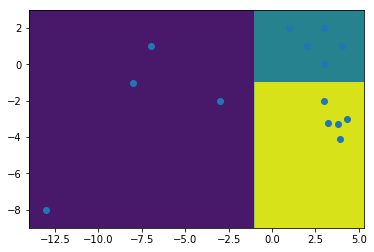

In [12]:
X = features

# this splits the data into x and y components, and makes the grid based on the data
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# we create our plot
fig, ax = plt.subplots()
# this plots our data points
ax.scatter(X0, X1)
# this uses the plot_contours function we defined to color in regions based on our decision tree
plot_contours(ax, clf, xx, yy)
# this shows our plot
plt.show()

Does this match the sketch that you made?

Now that we've seen how we can use decision trees with a small fake dataset, let's see how this works for real data!

## Breast Cancer Dataset

When working with the breast cancer dataset, we attempt to answer the question: can we predict if a tissue sample is cancerous, based only on its shape?

The breast cancer dataset consists of measurements of samples taken from breast tumors, which are classified as malignant (cancerous) or benign (non-cancerous). The various measurements describe the shape of the sample.

As we did with the iris dataset, we can load the breast cancer dataset from scikit-learn.

In [0]:
from sklearn.datasets import load_breast_cancer
bcdata = load_breast_cancer()

Before we start to analyze our data, let's see what this data set looks like.

In [14]:
bcdata

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

We see that there is the observation data, which is the measurements describing the shape of the samples. We also have the target, which is the classification of the tumors as malignant or benign.

We'll split the dataset into training and testing data. We'll later use the training data to train our decision tree, and then use the testing data to evaluate how well our decision tree performs.

For our split, we'll take 75% of the data for training, and leave 25% for testing. We'll choose to seed the random split using the number 42, just for fun.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X = bcdata.data
y = bcdata.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's use the training set to fit the decision tree.

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Now, let's see how well our decision tree performs on the testing set. We use the decision tree classifier that we just created to predict if the samples from the testing set are malignant or benign, based on their measurements.

In [0]:
y_pred = clf.predict(X_test)

Now, let's look at the confusion matrix to see how the predictions for the testing data compare to the actual classifications of tumors.

In [25]:
confusion_matrix(y_test, y_pred)

array([[51,  3],
       [ 5, 84]])

We can also compute the accuracy of our model on the testing data.

In [26]:
accuracy_score(y_pred, y_test)

0.9440559440559441

That accuracy seems pretty good, what do you think?

Finally, let's see what the decision tree looks like. For this dataset, we have much more complicated data than we had for our small example, and we see that we end up with a more complicated tree.

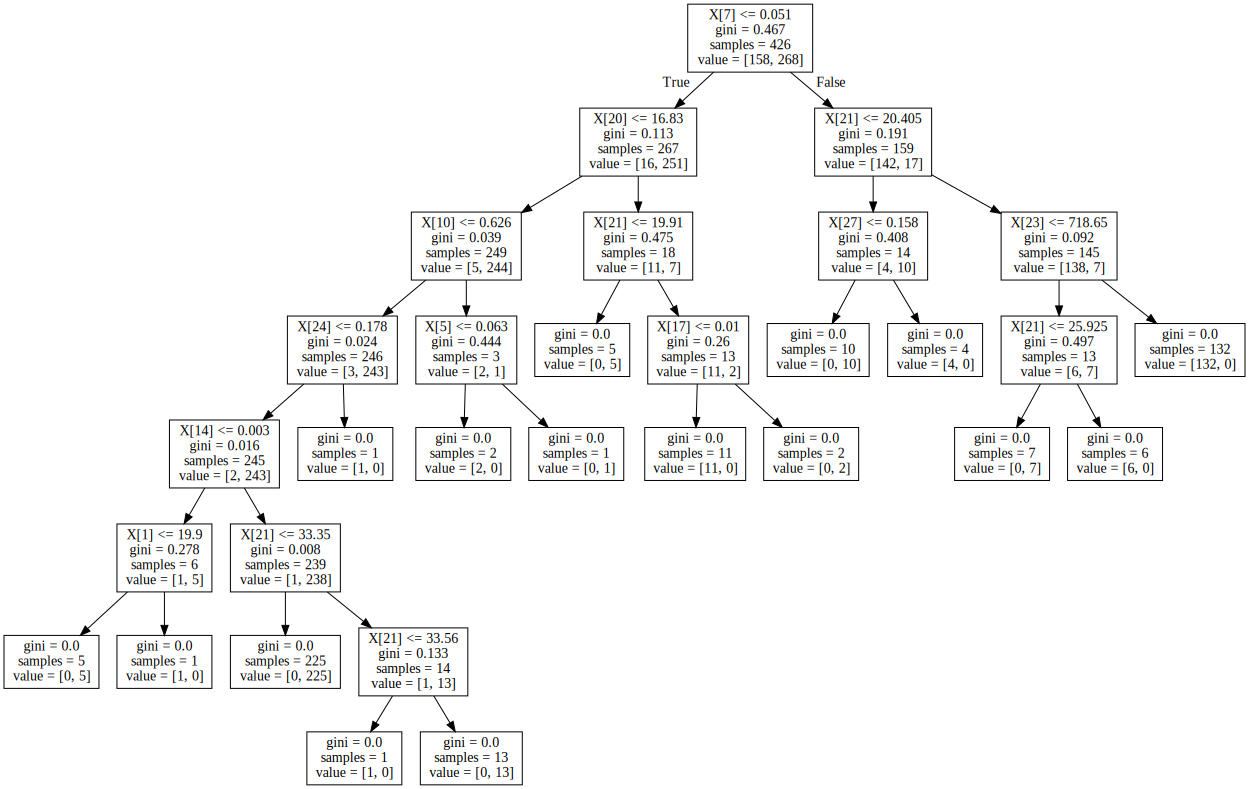

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Remember that we are trying to predict if cells are cancerous or not, and this can have serious consequences for people's lives.

With this in mind, what do you think of the accuracy of our model?

Should both types of misclassification errors be treated equally? That is, is it worse to classify a benign tumor as malignant, or is it worse to classify a malignant tumor as benign?

## Random forests

One method for improving the performance of our decision trees is something called a *random forest*. If you put a lot of trees together.... you get a forest! Essentially, we will train a lot of decision trees, and then combine their information to get a model that performs better than any of the individual trees.

So far, we have:
* made a single decision tree by hand from all the data we had
* split our data into training and testing sets, so that we could make a decision tree on the training data and test the accuracy of the model on our testing data, 
* and looked over our shoulders at our neighbors' decision trees and noticed that sometimes they're different, even though we started with the same data.

Now, let's do some _ensemble_ learning. Ensemble means "together" in French, and ensemble learning involves putting together lots of models and looking at their average predictions, or the most popular prediction, depending on what you want to do. Random forests involve picking a random subset of the data and fitting a tree, then picking another random subset of the data and making a tree, and making tree after tree until you have a forest.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
rf_pred = rf.predict(X_test)

In [30]:
accuracy_score(rf_pred, y_test)

0.965034965034965

Python does the random forest part automatically, and our accuracy went up to around 97%. When it comes to cancer, how important do you think that difference is?